In [28]:
using QuantumOptics
using Plots

In [29]:
function theoretical_wtd(τ, Ω, Γ)
    λ = sqrt(Ω^2 - (Γ/2.)^2) / 2.
    return (Ω / 2. * λ)^2 * (sin(λ * τ))^2 * exp(- Γ * τ / 2.)
end

theoretical_wtd (generic function with 1 method)

In [36]:
# A qubit has to be creates as a spin-1/2 system.  
b = SpinBasis(1//2)

# Initial state.
ψ0 = spindown(b)

# Parameters.
δ = 0.
Ω = 1
Γ = 0.1

# Hamiltonian.
H = - δ * sigmap(b) * sigmam(b) + Ω/2. * (sigmap(b) + sigmam(b))

# Collapse operators.
J = sqrt(Γ) * sigmam(b);

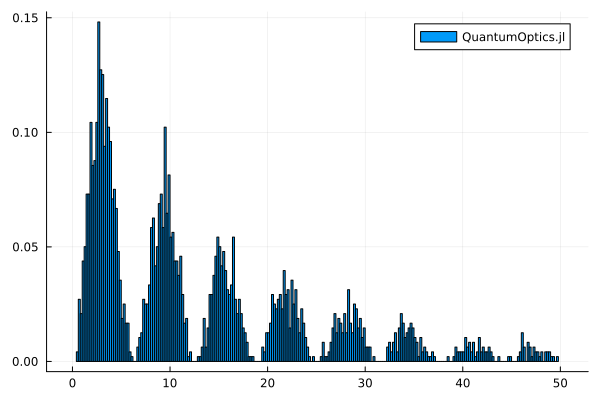

In [38]:
dt = 0.01
t_final = 50

t_span = 0:dt:t_final

number_trajectories = 1000
v_waiting = []

for trajectory in 1:number_trajectories
    result = timeevolution.mcwf(t_span,  ψ0, H, [J], display_jumps=true)

    # Computes the differences.
    jump_times = result[3]

    if length(jump_times) > 0
        push!(v_waiting, jump_times[1])

        for j in 2:length(jump_times)
            diff_time = jump_times[j] - jump_times[j-1]
            push!(v_waiting, diff_time)
        end
    end
end

v_theo_wtd = []
t_range = 0:dt:t_final
for t in t_range
    wtd = theoretical_wtd(t, Ω, Γ)
    push!(v_theo_wtd, wtd)
end

histogram(v_waiting, bins=300, normalize=true, label="QuantumOptics.jl")


In [39]:
times = result[1]
states_at_times = result[2]
jump_times = result[3]
jump_channels = result[4]

print(jump_times)

[2.268540423064061, 25.520887265288767, 49.4078065347165]